In [1]:
#import packages
from skimage import color
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
#function to convertrgb to gray
def to_gray(img_rgb):
    red = img_rgb[:,:,0]
    green = img_rgb[:,:,1]
    blue = img_rgb[:,:,2]
    gray = 0.298*red + 0.587*green + 0.114*blue
    return gray

Geometric transformation is an essential image processing techniques that have wide applications. One other exciting application is in training deep neural networks. Training deep model requires vast amount of data. And in almost all cases, models benefit from higher generalisation performance as training data increases. One way to artificially generate more data is to randomly apply an affine transformation to the input data. A technique also known as augmentation.

# For part of Geometry
**1. Load a greyscale image**

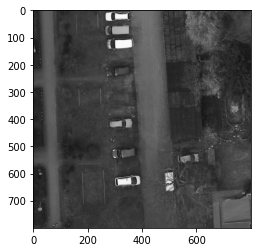

In [3]:
#load data
img_rgb = np.asarray(plt.imread('potsdam_RGB_2.tiff'))
img = to_gray(img_rgb)
plt.imshow(img, cmap ='gray')

**2. Apply the main affine transformations: scaling, rotation, translation, shearing.**

In [4]:
# Define Transformations
def get_rotation(angle):
    angle = np.radians(angle)
    return np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle),  np.cos(angle), 0]
    ])
def get_translation(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty]
    ])
def get_scale(s):
    return np.array([
        [s, 0, 0],
        [0, s, 0]
    ])
def get_shear(s,x):
    return np.array([
        [s, x, 0],
        [0, s, 0]
    ])

h, w = img.shape[:2]

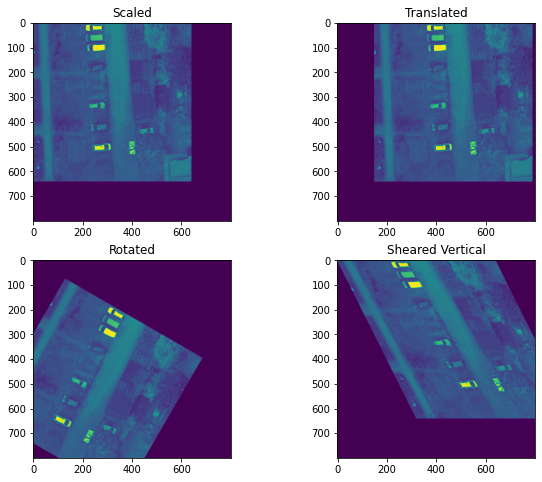

In [5]:
#scaling
scale_mat = get_scale(0.8)
scale_img = cv2.warpAffine(img, scale_mat, (w, h))

#translating
trans_mat = np.float32(get_translation(150,.5))
trans_img = cv2.warpAffine(scale_img, trans_mat, (w, h))

#rotation 
rot_mat = get_rotation(30)
rotated_image = cv2.warpAffine(trans_img, rot_mat, (w, h))

#sheared Vertical
shear_mat = np.float32(get_shear(1,0.5))
shear_img = cv2.warpAffine(scale_img, shear_mat, (w, h))

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.imshow(scale_img)
plt.title('Scaled')
plt.subplot(2,2,2)
plt.imshow(trans_img)
plt.title('Translated')
plt.subplot(2,2,3)
plt.imshow(rotated_image)
plt.title('Rotated')
plt.subplot(2,2,4)
plt.imshow(shear_img)
plt.title('Sheared Vertical')
plt.show()

**3. Compare the effect of the nearest neighbor, bilinear and bicubic interpolation schemes**

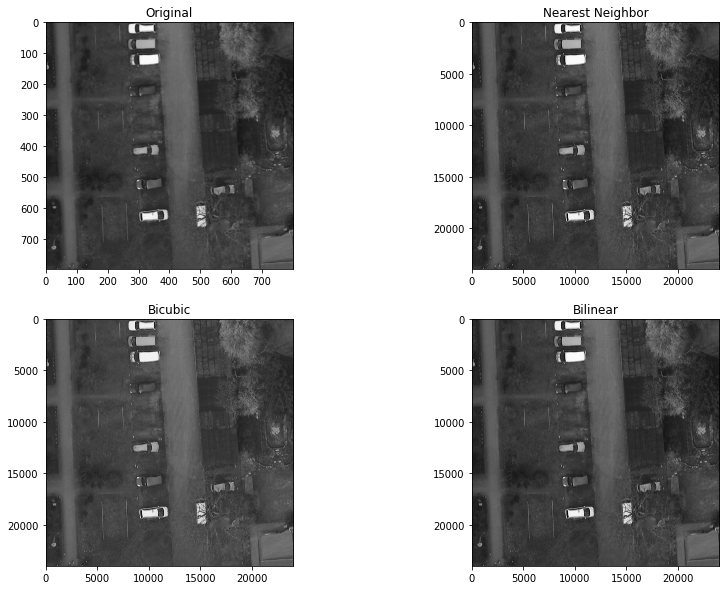

In [6]:
#nearest neighbour
near_img = cv2.resize(img,None, fx =30, fy = 30, interpolation = cv2.INTER_NEAREST)

#bicubic interpolation
bicubic_img = cv2.resize(img,None, fx = 30, fy = 30, interpolation = cv2.INTER_CUBIC)

#bilinear interpolation
bilinear_img = cv2.resize(img,None, fx = 30, fy = 30, interpolation = cv2.INTER_LINEAR)

#visualization
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.imshow(img, cmap= 'gray')
plt.title('Original')
plt.subplot(2,2,2)
plt.imshow(near_img,cmap ='gray')
plt.title('Nearest Neighbor')
plt.subplot(2,2,3)
plt.imshow(bicubic_img,cmap ='gray')
plt.title('Bicubic')
plt.subplot(2,2,4)
plt.imshow(bilinear_img,cmap ='gray')
plt.title('Bilinear')
plt.show()

Nearest Neighbour produce a pixelated image. Whereas bilinear produce a smooth image than the nearest neighbor but the results for sharp transitions like edges are not ideal because the results are a weighted average of 2 surrounding pixels. And  produce a sharper image than the other 2 methods.

# For part of Color

**1. Load a color image**

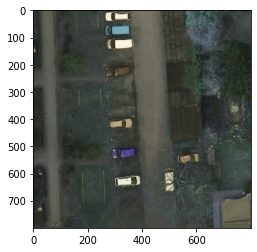

In [12]:
color_img = cv2.imread('potsdam_RGB_2.tiff')
plt.imshow(color_img)

Color similarity is accurately measured from distance in the space.It is an additive colorspace where colors are obtained by a linear combination of Red, Green, and Blue values. The three channels are correlated by the amount of light hitting the surface.

**2. Transform this image in the Lab and HSL color space, and display its color components**

The Lab color space has three components.
* L – Lightness ( Intensity ).
* a – color component ranging from Green to Magenta.
* b – color component ranging from Blue to Yellow.

The Lab color space is quite different from the RGB color space. In RGB color space the color information is separated into three channels but the same three channels also encode brightness information. On the other hand, in Lab color space, the L channel is independent of color information and encodes brightness only. The other two channels encode color.

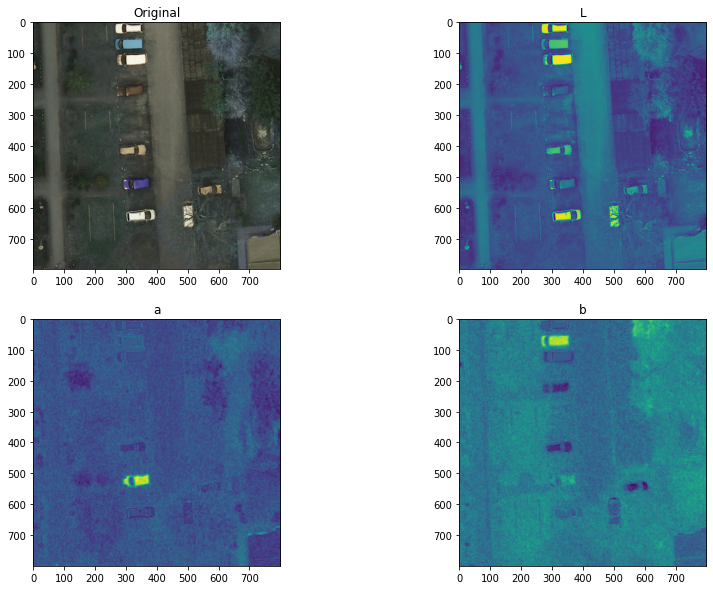

In [13]:
#lab
imgLAB = cv2.cvtColor(color_img,cv2.COLOR_BGR2Lab)

#visualization
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.imshow(color_img)
plt.title('Original')
plt.subplot(2,2,2)
plt.imshow(imgLAB[:,:,0])
plt.title('L')
plt.subplot(2,2,3)
plt.imshow(imgLAB[:,:,1])
plt.title('a')
plt.subplot(2,2,4)
plt.imshow(imgLAB[:,:,2])
plt.title('b')
plt.show()

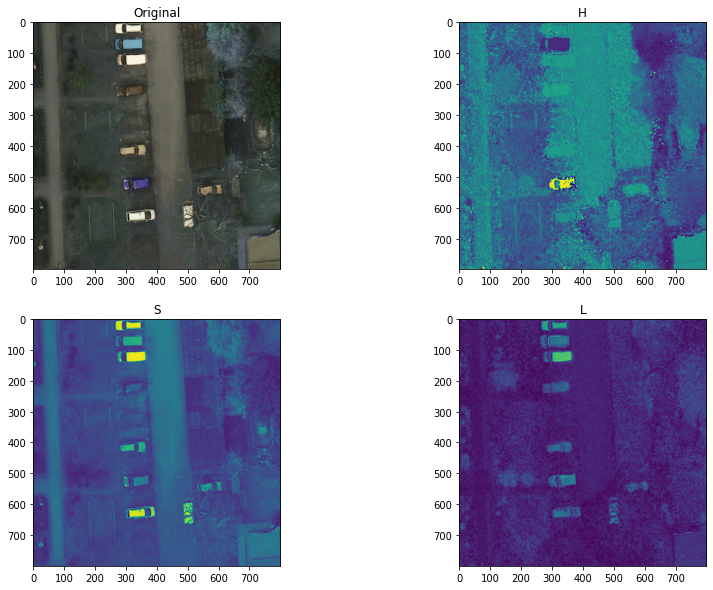

In [14]:
#HSL
imgHSL =cv2.cvtColor(color_img,cv2.COLOR_BGR2HLS)

#visualization
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.imshow(color_img)
plt.title('Original')
plt.subplot(2,2,2)
plt.imshow(imgHSL[:,:,0])
plt.title('H')
plt.subplot(2,2,3)
plt.imshow(imgHSL[:,:,1])
plt.title('S')
plt.subplot(2,2,4)
plt.imshow(imgHSL[:,:,2])
plt.title('L')
plt.show()

HSL stands for hue, saturation, and lightness - and represents a cylindrical-coordinate representation of colors.
Hue is a degree on the color wheel from 0 to 360. 0 is red, 120 is green, 240 is blue. Saturation is a percentage value; 0% means a shade of gray and 100% is the full color. Lightness is also a percentage; 0% is black, 100% is white.

**3. Threshold/segment the image given some color of interests**

Text(0.5, 1.0, 'segmented')

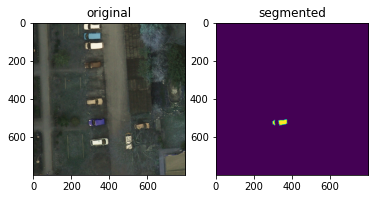

In [15]:
#color based segmentation
purple_car=np.logical_and(color_img[:,:,2]>120, color_img[:,:,1]<90, color_img[:,:,0] < 90)
plt.figure()
plt.subplot(121)
plt.imshow(color_img)
plt.title('original')
plt.subplot(122)
plt.imshow(purple_car)
plt.title('segmented')

**4. Apply some standard color composition methods on a multispectral image**

Text(0.5, 1.0, 'HSV')

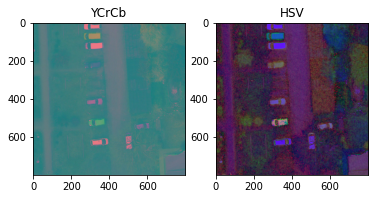

In [16]:
#1.YCrCb Color composition
imgYCB = cv2.cvtColor(color_img, cv2.COLOR_BGR2YCrCb)

#2. HSV color composition
imgtHSV = cv2.cvtColor(color_img, cv2.COLOR_BGR2HSV)

plt.figure()
plt.subplot(121)
plt.imshow(imgYCB)
plt.title('YCrCb')
plt.subplot(122)
plt.imshow(imgtHSV)
plt.title('HSV')

With the completion of above task it was understood that how these geometric and color transformations work under the hood when we use powerful libraries.